# 1 Введение

## 1.1 Pandas. Работа с таблицами

[Документация Pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame)

In [1]:
import pandas as pd
import numpy as np

In [2]:
# создание датафрейма из файла csv
data = pd.read_csv('https://stepik.org/media/attachments/course/4852/StudentsPerformance.csv')
# показать первые строки (5 - по умолчанию)
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
# описательная статистика
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [4]:
data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [5]:
# количество всех элементов таблицы
data.size

8000

In [6]:
# размерность датафрейма
data.shape

(1000, 8)

In [7]:
# группировка с последущей аггрегацией
data.groupby('gender').agg(['sum', 'mean'])

math score            reading score            writing score           
              sum       mean           sum       mean           sum       mean
gender                                                                        
female      32962  63.633205         37611  72.608108         37538  72.467181
male        33127  68.728216         31558  65.473029         30516  63.311203

In [8]:
# Выбор определенных строк и столбцов таблицы по целочисленному индексу
data.iloc[0:5, 0:3]

,gender,race/ethnicity,parental level of education
0,female,group B,bachelor's degree
1,female,group C,some college
2,female,group B,master's degree
3,male,group A,associate's degree
4,male,group C,some college


In [9]:
data.iloc[[1,3,7], [-3, 1, -1]]

,math score,race/ethnicity,writing score
1,69,group C,88
3,47,group A,44
7,40,group B,39


In [10]:
# Выбор определенных строк и столбцов таблицы по названиям строк или логического массива
data_name = data.iloc[[1,3,7,12, 17]]
data_name.index = ['Jefre', 'Charli', 'Hanna', 'Manhita', 'Tod']
data_name

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
Jefre,female,group C,some college,standard,completed,69,90,88
Charli,male,group A,associate's degree,free/reduced,none,47,57,44
Hanna,male,group B,some college,free/reduced,none,40,43,39
Manhita,female,group B,high school,standard,none,65,81,73
Tod,female,group B,some high school,free/reduced,none,18,32,28


In [11]:
data_name.loc[['Charli', 'Tod'], ['reading score', 'gender']]

,reading score,gender
Charli,57,male
Tod,32,female


DataFrame состоит из Series. Series это колонка из DataFrame

In [12]:
# Выберем все строки первой колонки
seria = data_name.iloc[:, 0]
seria

Jefre      female
Charli       male
Hanna        male
Manhita    female
Tod        female
Name: gender, dtype: object

In [13]:
# Проверим тип данных
type(seria)

pandas.core.series.Series

In [14]:
type(data_name)

pandas.core.frame.DataFrame

In [15]:
# Создадим серии
series_1 = pd.Series([1, 2, 3], index=['Jefre', 'Charli', 'Hanna'])
series_2 = pd.Series([4, 5, 6], index=['Jefre', 'Charli', 'Hanna'])

In [16]:
# Создадим датафрейм из серий
pd.DataFrame({'column_1': series_1, 'column_2': series_2})

,column_1,column_2
Jefre,1,4
Charli,2,5
Hanna,3,6


### Задание 1


Число колонок в представленном датафрэйме _, а число строк _Тип float имеют колонки _, int - _, и object _


In [17]:
df = pd.read_csv('Data/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
df.shape

(891, 12)

In [19]:
df.dtypes.value_counts()

int64      5
object     5
float64    2
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 1.2 Фильтрация данных

### 1.2.1 Условия

In [21]:
# Условие фильрации
data.loc[data.gender == 'female'].head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92


In [22]:
# среднее значение
data['math score'].mean()

66.089

In [23]:
# множественное условие
data[(data['gender'] == 'female') & (data['math score'] > data['math score'].mean())][['gender', 'math score']].head()

,gender,math score
0,female,72
1,female,69
2,female,90
5,female,71
6,female,88


### Задание 2

У какой доли студентов из датасэта в колонке lunch указано free/reduced?

In [24]:
total_student = len(data)
total_student

1000

In [25]:
number_free_reduced = data.loc[data['lunch'] == 'free/reduced', 'lunch'].value_counts().loc['free/reduced']
number_free_reduced

355

In [26]:
segment = number_free_reduced / total_student
segment

0.355

### Задание 3

Как различается среднее и дисперсия оценок по предметам у групп студентов со стандартным или урезанным ланчем?

In [27]:
data.groupby('lunch')[['math score', 'reading score', 'writing score']].agg(['mean', 'var']).round(2)

math score         reading score         writing score        
                   mean     var          mean     var          mean     var
lunch                                                                      
free/reduced      58.92  229.82         64.65  221.87         63.02  238.20
standard          70.03  186.42         71.65  191.29         70.82  205.62

In [28]:
# Переименовывание столбцов
data.rename(columns = lambda x:x.replace(' ', '_'), inplace=True)
data.columns

Index(['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

### 1.2.2 Query

In [29]:
data.query("writing_score > 70").head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78


In [30]:
data.query("gender == 'female' & (reading_score >= 80 | math_score > 85)").head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
12,female,group B,high school,standard,none,65,81,73


In [31]:
# К переменным обращаться через @
my_score = 88
data.query("gender == 'female' & reading_score >= @my_score").head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
6,female,group B,some college,standard,completed,88,95,92
38,female,group D,associate's degree,free/reduced,completed,75,90,88
102,female,group D,associate's degree,standard,none,85,91,89


 ### 1.2.3 Фильтр колонок или строк

In [32]:
my_columns = [i for i in data.columns if 'score' in i]
data[my_columns].head()

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [33]:
data.filter(like='score', axis=1).head()

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


### 1.2.4 Группировка

In [34]:
data.groupby('gender', as_index=False) \
    .agg({'math_score': 'mean', 'reading_score': 'mean'}) \
    .rename(columns={'math_score':'mean_math_score', 'reading_score':'mean_reading_score'})

,gender,mean_math_score,mean_reading_score
0,female,63.633205,72.608108
1,male,68.728216,65.473029


### Мультииндексы

In [35]:
data.groupby(['gender', 'race/ethnicity']).math_score.nunique()

gender  race/ethnicity
female  group A           29
        group B           51
        group C           59
        group D           53
        group E           44
male    group A           38
        group B           43
        group C           56
        group D           49
        group E           38
Name: math_score, dtype: int64

Вывести топ 5 девушек и мужчин по математике

In [36]:
data.sort_values(['gender', 'math_score'], ascending=False).groupby('gender').head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
149,male,group E,associate's degree,free/reduced,completed,100,100,93
623,male,group A,some college,standard,completed,100,96,86
625,male,group D,some college,standard,completed,100,97,99
916,male,group E,bachelor's degree,standard,completed,100,100,100
306,male,group E,some college,standard,completed,99,87,81
451,female,group E,some college,standard,none,100,92,97
458,female,group E,bachelor's degree,standard,none,100,100,100
962,female,group E,associate's degree,standard,none,100,100,100
114,female,group E,bachelor's degree,standard,completed,99,100,100
263,female,group E,high school,standard,none,99,93,90


### 1.2.5 Создание колонки

In [37]:
data['total_score'] = data.math_score + data.reading_score + data.writing_score
data.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [38]:
data.assign(total_score_log=np.log(data.total_score)).head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,total_score_log
0,female,group B,bachelor's degree,standard,none,72,72,74,218,5.384495
1,female,group C,some college,standard,completed,69,90,88,247,5.509388
2,female,group B,master's degree,standard,none,90,95,93,278,5.627621
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,4.997212
4,male,group C,some college,standard,none,76,78,75,229,5.433722


### 1.2.6 Удаление колонки

In [39]:
data.drop(['total_score'], axis=1).head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Задание. Dota

In [40]:
dota = pd.read_csv('Data/dota_hero_stats.csv')
dota.head()

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"


In [41]:
dota.groupby('legs').count()

,Unnamed: 0,attack_type,id,localized_name,name,primary_attr,roles
legs,,,,,,,
0,11,11,11,11,11,11,11
2,95,95,95,95,95,95,95
4,7,7,7,7,7,7,7
6,3,3,3,3,3,3,3
8,1,1,1,1,1,1,1


In [42]:
dota['legs'].value_counts()

2    95
0    11
4     7
6     3
8     1
Name: legs, dtype: int64

In [43]:
dota.groupby(['attack_type', 'primary_attr']).agg({'Unnamed: 0': 'count'})

Unnamed: 0
attack_type primary_attr            
Melee       agi                   19
            int                    2
            str                   35
Ranged      agi                   18
            int                   40
            str                    3

### Задание. Lupa and Pupa

In [44]:
df = pd.read_csv('Data/accountancy.csv')
df.head()

,Unnamed: 0,Executor,Type,Salary
0,0,Pupa,D,63
1,1,Pupa,A,158
2,2,Pupa,D,194
3,3,Pupa,E,109
4,4,Loopa,E,184


In [45]:
df.groupby(['Executor','Type']).Salary.mean()

Executor  Type
Loopa     A        58.000000
          B       145.166667
          C       154.333333
          D       137.714286
          E       164.000000
          F       238.000000
Pupa      A       160.833333
          B        77.000000
          C        74.500000
          D       146.500000
          E       131.200000
          F       136.250000
Name: Salary, dtype: float64

In [46]:
df.groupby(['Executor','Type']).Salary.mean().unstack()

Type,A,B,C,D,E,F
Executor,,,,,,
Loopa,58.000000,145.166667,154.333333,137.714286,164.0,238.00
Pupa,160.833333,77.000000,74.500000,146.500000,131.2,136.25


### Задание. Водоросли

In [47]:
concentrations = pd.read_csv('Data/algae.csv')
concentrations.head()

,species,genus,group,sucrose,alanin,citrate,glucose,oleic_acid
0,Fucus_vesiculosus,Fucus,brown,3.001472,3.711498,5.004262,2.548459,6.405165
1,Saccharina_japonica,Saccharina,brown,6.731070,1.255251,5.621499,6.013219,4.156700
2,Fucus_serratus,Fucus,brown,3.276870,0.346431,1.216767,3.623225,0.304573
3,Fucus_distichus,Fucus,brown,6.786996,6.641303,6.423606,2.272724,3.393203
4,Cladophora_fracta,Cladophora,green,3.861470,1.648450,6.940588,2.316955,2.528886


In [48]:
mean_concentrations = concentrations.groupby('genus').mean()
mean_concentrations

,sucrose,alanin,citrate,glucose,oleic_acid
genus,,,,,
Ascophyllum,6.825467,0.875429,5.253527,3.414961,2.432526
Cladophora,4.008792,3.997055,5.288311,2.800276,2.263472
Fucus,4.355112,3.566411,4.214878,2.814803,3.367647
Palmaria,0.704580,3.176440,5.573905,3.242090,2.245538
Saccharina,4.183596,3.524207,3.346710,4.980594,4.487252


In [49]:
concentrations.groupby('genus').alanin.agg(['max', 'min', 'mean']).loc['Fucus'].round(2)

max     6.64
min     0.35
mean    3.57
Name: Fucus, dtype: float64

In [50]:
concentrations.groupby('group').var().citrate

group
brown    5.468942
green    3.950113
red           NaN
Name: citrate, dtype: float64

In [51]:
concentrations.groupby('group').count()

,species,genus,sucrose,alanin,citrate,glucose,oleic_acid
group,,,,,,,
brown,6,6,6,6,6,6,6
green,3,3,3,3,3,3,3
red,1,1,1,1,1,1,1


In [52]:
concentrations.groupby('group').agg({'sucrose': lambda x: x.max()-x.min()})\
    .round(2).rename(columns={'sucrose': 'scope'})

,scope
group,
brown,5.19
green,3.26
red,0.00


## 1.3 Визуализация

In [53]:
import matplotlib.pyplot as plt
import seaborn as sbs

In [54]:
#%matplotlib notebook

<AxesSubplot:>

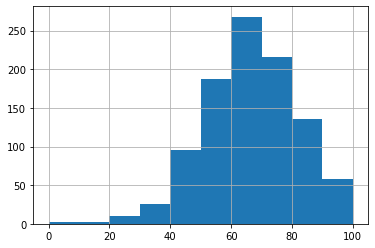

In [55]:
data.math_score.hist()

<AxesSubplot:xlabel='math_score', ylabel='reading_score'>

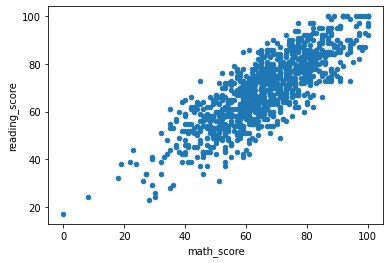

In [56]:
data.plot.scatter(x='math_score', y='reading_score')

In [57]:
%matplotlib inline 

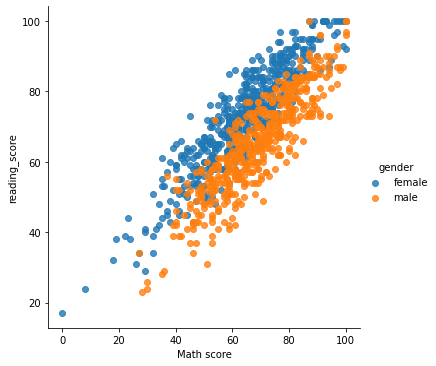

In [58]:
ax = sbs.lmplot(x='math_score', y='reading_score', hue='gender', data=data, fit_reg=False)
ax.set_xlabels('Math score')

<AxesSubplot:>

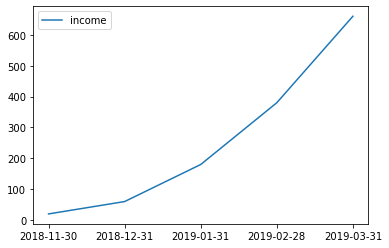

In [59]:
income = pd.read_csv('Data/income.csv')
sbs.lineplot(data=income)

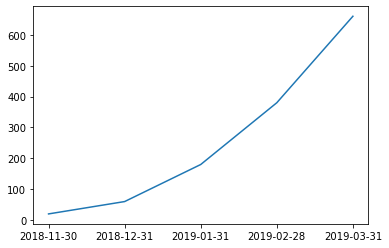

In [60]:
plt.plot(income.index, income.income)

<AxesSubplot:>

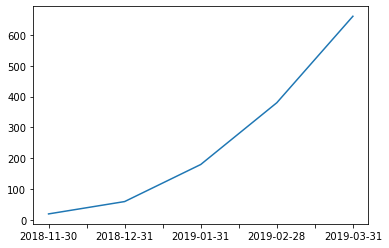

In [61]:
income['income'].plot()

In [62]:
df = pd.read_csv('Data/dataset_209770_6.txt', delimiter=' ')
df.head()

,x,y
0,94.284450,601.283461
1,98.776678,602.566682
2,1394.308748,1492.019542
3,1403.734872,1498.922541
4,789.705575,705.866549


<AxesSubplot:xlabel='x', ylabel='y'>

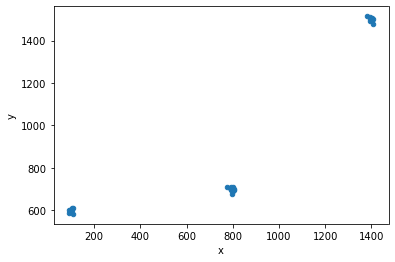

In [63]:
df.plot.scatter(x='x', y='y')

In [64]:
gen = pd.read_csv('Data/genome_matrix.csv', index_col=0)
gen.head()

,species0,species1,species2,species3,species4
species0,0.536029,0.920292,0.679708,0.840606,0.430842
species1,0.920292,0.862417,0.887593,0.769754,0.203214
species2,0.679708,0.887593,0.595156,0.003435,0.096052
species3,0.840606,0.769754,0.003435,0.458870,0.029251
species4,0.430842,0.203214,0.096052,0.029251,0.642109


<AxesSubplot:>

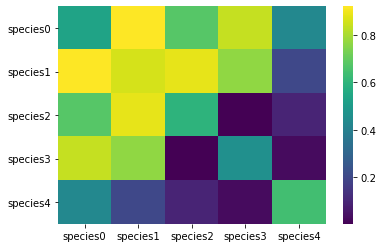

In [65]:
sbs.heatmap(data=gen, cmap="viridis")

In [66]:
dota2 = pd.read_csv('Data/dota_hero_stats.csv')
dota2.head()

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"


### ДОТА

In [67]:
dota2['roles_count'] = dota2['roles'].str.count(',')+1
dota2.head()

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles,roles_count
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']",3
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']",4
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']",4
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini...",5
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']",4


<AxesSubplot:>

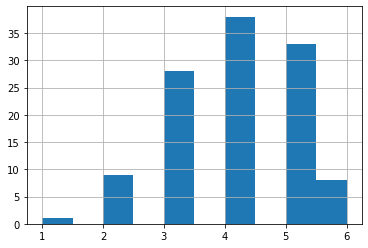

In [68]:
dota2['roles_count'].hist()

In [69]:
dota2['roles_count'].value_counts()

4    38
5    33
3    28
2     9
6     8
1     1
Name: roles_count, dtype: int64

### ИРИС

In [70]:
iris = pd.read_csv('Data/iris.csv')
iris.set_index('Unnamed: 0', inplace=True)
#iris.drop(['species', 'Unnamed: 0'], axis=1, inplace=True)
iris.head()

,sepal length,sepal width,petal length,petal width,species
Unnamed: 0,,,,,
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


C:\Programs\Anaconda\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Programs\Anaconda\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Programs\Anaconda\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

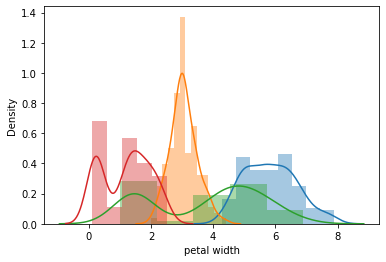

In [71]:
for column in iris.iloc[:,:-1]:
    # Draw distribution with that column
    sbs.distplot(iris[column])

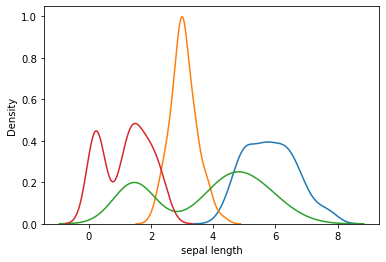

In [72]:
for column in iris.iloc[:,:-1]:
    # Draw distribution with that column
    sbs.kdeplot(data=iris[column])

<AxesSubplot:xlabel='petal length'>

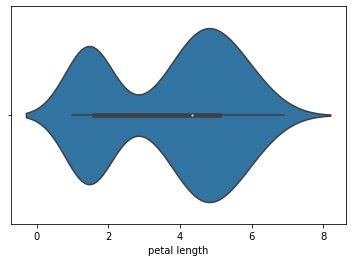

In [73]:
sbs.violinplot(x=iris["petal length"])

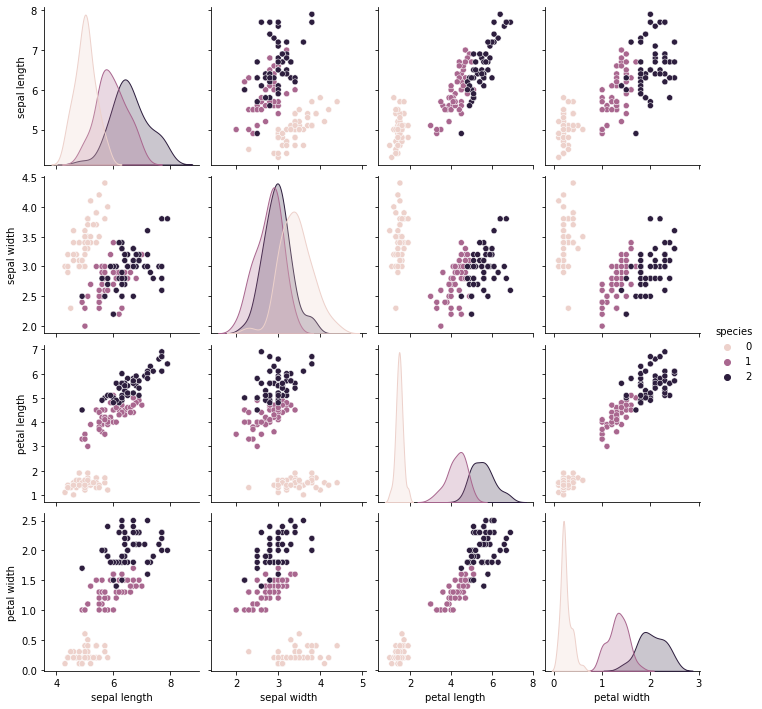

In [74]:
sbs.pairplot(iris, hue="species")

## Практика

In [75]:
data = {'type': ['A', 'A', 'B', 'B'], 'value': [10, 14, 12, 23]}
my_data = pd.DataFrame(data=data)
my_data

,type,value
0,A,10
1,A,14
2,B,12
3,B,23


In [76]:
my_stat = pd.read_csv('Data/my_stat.csv')
my_stat.head()
my_stat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      500 non-null    int64  
 1   V2      500 non-null    float64
 2   V3      500 non-null    object 
 3   V4      500 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 15.8+ KB


In [77]:
subset_1 = my_stat.iloc[:10, [0, 2]]
subset_1

,V1,V3
0,2,B
1,-1,B
2,0,A
3,2,A
4,0,B
5,2,A
6,0,A
7,1,A
8,0,B
9,-1,A


In [78]:
bad_df = my_stat.index.isin([1,5])
subset_2 = my_stat[~bad_df][['V2', 'V4']]
subset_2.head()

,V2,V4
0,13.0,1.0
2,11.0,0.0
3,11.0,2.0
4,10.0,-1.0
6,9.0,2.0


In [79]:
subset_1 = my_stat[(my_stat['V1'] > 0) & (my_stat['V3'] == 'A')]
subset_1.head()

,V1,V2,V3,V4
3,2,11.0,A,2.0
5,2,11.0,A,0.0
7,1,9.0,A,1.0
10,1,10.0,A,1.0
13,1,12.0,A,3.0


In [80]:
subset_2 = my_stat[(my_stat['V2'] != 10) | (my_stat['V4'] >= 1)]
subset_2.head()

,V1,V2,V3,V4
0,2,13.0,B,1.0
1,-1,7.0,B,1.0
2,0,11.0,A,0.0
3,2,11.0,A,2.0
5,2,11.0,A,0.0


In [81]:
my_stat['V5'] = my_stat['V1'] + my_stat['V4']

In [82]:
import numpy as np

In [83]:
my_stat['V6'] = np.log(my_stat['V2'])
my_stat.head()

,V1,V2,V3,V4,V5,V6
0,2,13.0,B,1.0,3.0,2.564949
1,-1,7.0,B,1.0,0.0,1.945910
2,0,11.0,A,0.0,0.0,2.397895
3,2,11.0,A,2.0,4.0,2.397895
4,0,10.0,B,-1.0,-1.0,2.302585


In [84]:
my_stat.rename(columns = {'V1': 'session_value', 'V2': 'group', 'V3': 'time', 'V4': 'n_users'}, inplace=True)

In [85]:
my_stat.head()

,session_value,group,time,n_users,V5,V6
0,2,13.0,B,1.0,3.0,2.564949
1,-1,7.0,B,1.0,0.0,1.945910
2,0,11.0,A,0.0,0.0,2.397895
3,2,11.0,A,2.0,4.0,2.397895
4,0,10.0,B,-1.0,-1.0,2.302585


In [86]:
my_stat = pd.read_csv('Data/my_stat_1.csv')
my_stat.head()


,session_value,time,group,n_users
0,0.0,12,B,9
1,NaN,11,A,-1
2,1.0,8,A,1
3,2.0,9,B,3
4,2.0,10,B,9


In [87]:
my_stat['session_value'].fillna(0, inplace=True)
my_stat

,session_value,time,group,n_users
0,0.0,12,B,9
1,0.0,11,A,-1
2,1.0,8,A,1
3,2.0,9,B,3
4,2.0,10,B,9
5,3.0,8,A,8
6,0.0,11,B,5
7,0.0,9,A,4
8,0.0,8,B,-11
9,0.0,9,A,-20


In [88]:
median = my_stat.query('n_users >= 0')['n_users'].median()
median

5.0

In [89]:
my_stat.fillna(method='ffill')

,session_value,time,group,n_users
0,0.0,12,B,9
1,0.0,11,A,-1
2,1.0,8,A,1
3,2.0,9,B,3
4,2.0,10,B,9
5,3.0,8,A,8
6,0.0,11,B,5
7,0.0,9,A,4
8,0.0,8,B,-11
9,0.0,9,A,-20


In [90]:
my_stat.loc[my_stat.n_users < 0, 'n_users'] = median
my_stat

,session_value,time,group,n_users
0,0.0,12,B,9
1,0.0,11,A,5
2,1.0,8,A,1
3,2.0,9,B,3
4,2.0,10,B,9
5,3.0,8,A,8
6,0.0,11,B,5
7,0.0,9,A,4
8,0.0,8,B,5
9,0.0,9,A,5


In [91]:
mean_session_value_data = my_stat.groupby('group', as_index=False)['session_value'].mean()\
.rename(columns={'session_value': 'mean_session_value'})
mean_session_value_data

,group,mean_session_value
0,A,0.8
1,B,0.8
